# PLOT Notes


# Matplib - generating plots concoiusly 
2019.07.12.  
based on https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo


## Pyplot and object-oriented API
these are two different coding styles to make plots in matplolib, Object-oriented (OO) API style is officially recommended - we utilize an instance of axes.Axes in order to render visualizations on an instance of figure.Figure. The second is based on MATLAB and uses a state-based interface. This is encapsulated in the pyplot module. important thinkgs:  
* The Figure is the final image that may contain 1 or more Axes.
* The Axes represent an individual plot (don't confuse this with the word "axis", which refers to the x/y axis of a plot). 

For more info see:   
* pyplot tutorial https://matplotlib.org/tutorials/introductory/pyplot.html
* OO API tutorial https://matplotlib.org/tutorials/introductory/lifecycle.html

## Pylot interface
* MATLAB-user-friendly style in which everything is done with plt.*** 
* very fast, but has limited options
* Example 1: Pyplot example - simple plots
* called "stateful interface" - which figure and subplot you are currently in

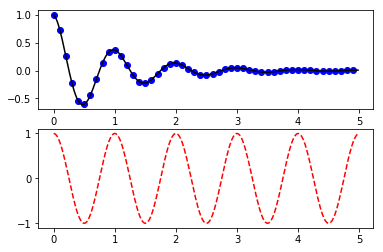

In [4]:
"""
    Example 1: Pyplot example - simple plots
"""

import numpy as np
import matplotlib.pyplot as plt


#https://matplotlib.org/tutorials/introductory/pyplot.html
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show();


## OO API style
* fig, ax = plt.subplots(), followed by ax.plot, ax.imshow etc. fig and ax are, artists.  
* fig.add_subplot, alternative starting stetment
* fig = plt.gcf() and ax = plt.gca(). used when you switch from Pyplot interface to OO interface 

### The hierarchy in matplotlib
    * matplotlib has a hierarchical structure of specia artist elelemnts called as "containers"
        * figure - wholle arrea to display
        * axes - individual ploits
        * axis - x,y axis to plot the data
        * 4th containers are ticks!
    * see figure at:https://res.cloudinary.com/practicaldev/image/fetch/s--dNi3F76s--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/rr39m52m6peef1drke7m.png
 
    * starting a figure      
        > fig, ax = plt.subplots() # make Figure and Axes which belongs to 'fig'  
        * ot  
        > fig = plt.figure() # make Figure  
        > ax = fig.add_subplot(1,1,1) # make Axes belonging to fig    
    
    * rules to remember:  
        * Figure can contain multiple Axes because fig.axes is a list of Axes.  
        * Axes can belong to only single Figure because ax.figure is not a list.  
        * Axes can have one XAxis and YAxis respectively for similar reason.  
        * XAxis and YAxis can belong to single Axes and, accordingly, single Figure.  
        > fig.axes  
        > ax.figure  
        > ax.xaxis  
        > ax.xaxis.axes  
        > ax.xaxis.figure  
        
    * Artists
        * every single component in a figure is an Artist object
        * names of all elements are here: https://res.cloudinary.com/practicaldev/image/fetch/s--1x1epD95--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/b9psb0mtz7yk8qmfe26f.png
        * two types of artists objects:  
       
            * CONTAINERS; 
                  Figure, Axes, Axis and Tick 
                  have many "boxes" (Python lists,) for each type of primitives.   
                  eg:, an Axes obj (ax), has an empty list ax.lines.   
                  a command ax.plot adds a Line2D obj to that list and does other accompanying settings silently.  
                  
            * PRIMITIVES; placed inside our containers, eg: Line2D made by ax.plot, PathCollection by ax.scatter, or Text by ax.annotate  
                  see Example 2: Containers and Primitives. 


ax.lines before plot:
 []
ax.lines after 1st plot:
ax.lines after 2nd plot:
 [<matplotlib.lines.Line2D object at 0x12256cdd8>, <matplotlib.lines.Line2D object at 0x12256cb70>]
line1: Line2D(1st plot)
line2: Line2D(2nd plot)


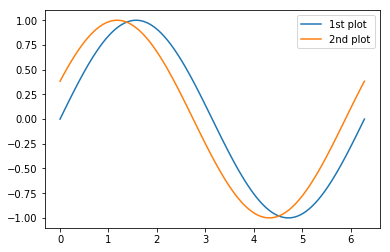

In [15]:
"""
    Example 2: Containers and Primitives
"""

# data
x = np.linspace(0, 2*np.pi, 100) # 100 numbers, equally distributed

# 
fig = plt.figure()
ax = fig.add_subplot(1,1,1) # make a blank plotting area
print('ax.lines before plot:\n', ax.lines) # empty
line1, = ax.plot(x, np.sin(x), label='1st plot') # add Line2D in ax.lines
print('ax.lines after 1st plot:\n', ax.lines)
line2, = ax.plot(x, np.sin(x+np.pi/8), label='2nd plot') # add another Line2D
print('ax.lines after 2nd plot:\n', ax.lines)
ax.legend()

print('line1:', line1)
print('line2:', line2)


## FIGURE CONTAINER

Important:
* Attributes with a plural name are lists and those with a singular name represent a single object.  
* Fig attributes can be chnaged into axis or axes attributes with Transforms   

Figure attributes & description:

* fig.axes // A list of Axes instances (includes Subplot)  
* fig.patch // The Rectangle background  
* fig.images // A list of FigureImages patches - useful for raw pixel display  
* fig.legends // A list of Figure Legend instances (different from Axes.legends)  
* fig.lines // A list of Figure Line2D instances (rarely used, see Axes.lines)  
* fig.patches // A list of Figure patches (rarely used, see Axes.patches)  
* fig.texts // A list Figure Text instances  

Legend
* we have ax.legend and fig.legend
* ax.legend only collects labels from Artists belonging to ax
* fig.legend gathers labels from all Axes under fig, eg for large number of plots wiht the same elements

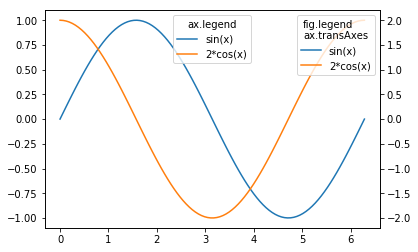

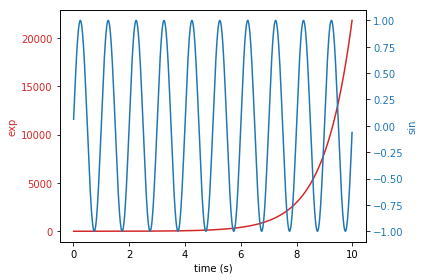

In [38]:
"""
    Example 3: Combining legends from different sources
"""

x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, np.sin(x), label='sin(x)')
ax1 = ax.twinx() # Create a twin Axes sharing the xaxis, ie second y axis on the right site 
ax1.plot(x, 2*np.cos(x), c='C1', label='2*cos(x)') 
# cf. 'CN' notation
# https://matplotlib.org/tutorials/colors/colors.html#cn-color-selection

# combined ax.legends
handler, label = ax.get_legend_handles_labels()
handler1, label1 = ax1.get_legend_handles_labels()
ax.legend(handler+handler1, label+label1, loc='upper center', title='ax.legend')
# Legend made by ax1.legend remains

# easy way with fig.legend and all handlers
fig.legend(loc='upper right', bbox_to_anchor=(1,1), 
           bbox_transform=ax.transAxes, title='fig.legend\nax.transAxes')

plt.show();

"""
    Example 3b: Using ax.twinx() to create second y axis with different scale
"""

import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## AXES CONTAINER
The matplotlib.axes.Axes is the center of the matplotlib universe  
Has the following objects:  
  * XAXIS  
  * YAXIS  
  * Ticks container  

How it works?  
  * Frequently-used commands such as ax.plot and ax.scatter are called "helper methods"   
  * helper methods add corresponding Artists in appropriate containers and do other miscellaneous jobs. 
  * ie. ax.plot and ax.scatter add Line2D and PathCollection objects in corresponding lists.  

Reusing a plotted object is not recommended  
  * helper methods do many things other than creating an Artist

ax.set_*** methods
  * Used to modify attributes and values of Axis and Tick instances  
  * static -  Changes made with them are not updated when something changed.
      * ie. if you chnage them for plot1, you will also get the same on another plot, unless chnage them again

Ticker. 
  * automatically update ticks for each new plot; formatter and locator
      * ax.xaxis.get_major_formatter()
      * ax.xaxis.get_major_locator()
  * Tick formatters:  https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html
     

## TICK CONTAINER
for a short line for a tick itself and a text for a tick label.







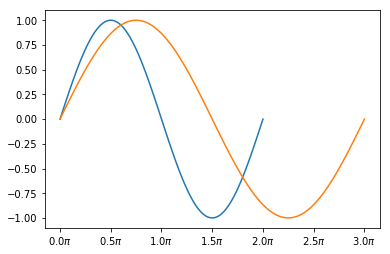

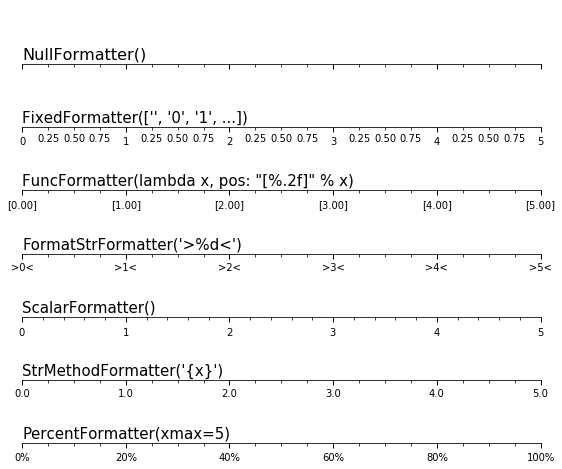

In [35]:
"""
    Example 4: Using Ticker for customized ticks & labels
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import matplotlib.ticker as ticker # this is required to used `Ticker`

x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1, = ax.plot(x, np.sin(x), label='') # X range: 0 to 2pi
ax.set_xticks([0, 0.5*np.pi, np.pi, 1.5*np.pi, 2*np.pi])
line2, = ax.plot(1.5*x, np.sin(x), label='') # X range: 0 to 3pi


# locate ticks at every 0.5*pi
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5*np.pi)) # locate ticks at every 0.5*pi


# custome tick labels
@ticker.FuncFormatter # FuncFormatter can be used as a decorator
def major_formatter_radian(x, pos):
    return '{}$\pi$'.format(x/np.pi) # probably not the best way to show radian tick labels
ax.xaxis.set_major_formatter(major_formatter_radian)

plt.show();


"""
    Example 5: Tick formatters:
    https://matplotlib.org/gallery/ticks_and_spines/tick-formatters.html
    
"""



# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


fig = plt.figure(figsize=(8, 6))
n = 7

# Null formatter
ax = fig.add_subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.text(0.0, 0.1, "NullFormatter()", fontsize=16, transform=ax.transAxes)

# Fixed formatter
ax = fig.add_subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
majors = ["", "0", "1", "2", "3", "4", "5"]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(majors))
minors = [""] + ["%.2f" % (x-int(x)) if (x-int(x))
                 else "" for x in np.arange(0, 5, 0.25)]
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))
ax.text(0.0, 0.1, "FixedFormatter(['', '0', '1', ...])",
        fontsize=15, transform=ax.transAxes)


# FuncFormatter can be used as a decorator
@ticker.FuncFormatter
def major_formatter(x, pos):
    return "[%.2f]" % x


ax = fig.add_subplot(n, 1, 3)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(major_formatter)
ax.text(0.0, 0.1, 'FuncFormatter(lambda x, pos: "[%.2f]" % x)',
        fontsize=15, transform=ax.transAxes)


# FormatStr formatter
ax = fig.add_subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(">%d<"))
ax.text(0.0, 0.1, "FormatStrFormatter('>%d<')",
        fontsize=15, transform=ax.transAxes)

# Scalar formatter
ax = fig.add_subplot(n, 1, 5)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.text(0.0, 0.1, "ScalarFormatter()", fontsize=15, transform=ax.transAxes)

# StrMethod formatter
ax = fig.add_subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
ax.text(0.0, 0.1, "StrMethodFormatter('{x}')",
        fontsize=15, transform=ax.transAxes)

# Percent formatter
ax = fig.add_subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=5))
ax.text(0.0, 0.1, "PercentFormatter(xmax=5)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()

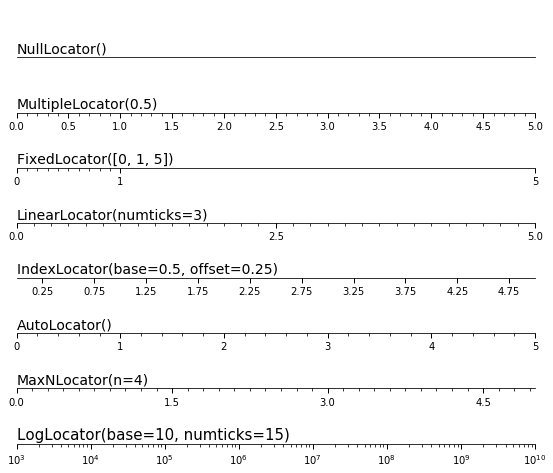

In [37]:
"""
    Example 6; Tick Locators
"""


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Setup a plot such that only the bottom spine is shown
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.patch.set_alpha(0.0)


plt.figure(figsize=(8, 6))
n = 8

# Null Locator
ax = plt.subplot(n, 1, 1)
setup(ax)
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.xaxis.set_minor_locator(ticker.NullLocator())
ax.text(0.0, 0.1, "NullLocator()", fontsize=14, transform=ax.transAxes)

# Multiple Locator
ax = plt.subplot(n, 1, 2)
setup(ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.text(0.0, 0.1, "MultipleLocator(0.5)", fontsize=14,
        transform=ax.transAxes)

# Fixed Locator
ax = plt.subplot(n, 1, 3)
setup(ax)
majors = [0, 1, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
minors = np.linspace(0, 1, 11)[1:-1]
ax.xaxis.set_minor_locator(ticker.FixedLocator(minors))
ax.text(0.0, 0.1, "FixedLocator([0, 1, 5])", fontsize=14,
        transform=ax.transAxes)

# Linear Locator
ax = plt.subplot(n, 1, 4)
setup(ax)
ax.xaxis.set_major_locator(ticker.LinearLocator(3))
ax.xaxis.set_minor_locator(ticker.LinearLocator(31))
ax.text(0.0, 0.1, "LinearLocator(numticks=3)",
        fontsize=14, transform=ax.transAxes)

# Index Locator
ax = plt.subplot(n, 1, 5)
setup(ax)
ax.plot(range(0, 5), [0]*5, color='white')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=.5, offset=.25))
ax.text(0.0, 0.1, "IndexLocator(base=0.5, offset=0.25)",
        fontsize=14, transform=ax.transAxes)

# Auto Locator
ax = plt.subplot(n, 1, 6)
setup(ax)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.text(0.0, 0.1, "AutoLocator()", fontsize=14, transform=ax.transAxes)

# MaxN Locator
ax = plt.subplot(n, 1, 7)
setup(ax)
ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
ax.xaxis.set_minor_locator(ticker.MaxNLocator(40))
ax.text(0.0, 0.1, "MaxNLocator(n=4)", fontsize=14, transform=ax.transAxes)

# Log Locator
ax = plt.subplot(n, 1, 8)
setup(ax)
ax.set_xlim(10**3, 10**10)
ax.set_xscale('log')
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.text(0.0, 0.1, "LogLocator(base=10, numticks=15)",
        fontsize=15, transform=ax.transAxes)

# Push the top of the top axes outside the figure because we only show the
# bottom spine.
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.05)

plt.show()